# Inference notebook 
### Anger inference dataset 
 



#Resources 

https://www.tensorflow.org/guide/keras/save_and_serialize

model = ...  # Get model (Sequential, Functional Model, or Model subclass)
model.save('path/to/location')

## 2. Importing the libraries

In [ ]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Let's connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Importing the Dataset

1.   This section could be replaced with another import file.. 
2.   Canonical workflow: CSV import -> DataFrame -> List of Tweets -> Tokenization



In [ ]:
#importing the 16K version of the datset...may need some data cleaning.. 

df = pd.read_csv('/content/drive/MyDrive/Sean/Emoclass_Dec2022/angry_tweets/Anger Inference Dataset - From Inference anger RNN/6cat_dec5,2022.csv')  

print(df.shape)

(16000, 3)


In [ ]:
df.head()

,Unnamed: 0,label,text
0,0,sadness,i didnt feel humiliated
1,1,sadness,i can go from feeling so hopeless to so damned...
2,2,anger,im grabbing a minute to post i feel greedy wrong
3,3,love,i am ever feeling nostalgic about the fireplac...
4,4,anger,i am feeling grouchy


In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,label,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [ ]:
df.label.unique()
# different labels than trained one.

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
tweets=df['text'].values.tolist()
labels=df['label'].values.tolist()


In [ ]:
tweets[0]

'i didnt feel humiliated'

In [ ]:
labels[0]

'sadness'

## 4. Tokenizing the Tweets

# Input into the tokenizer appears to be a list... verify... 

#To do - Nov 27, 2022 


1.   The input into the tokenizer appears to be a list... 
2.   What are the "acceptable" ranges for the num_words argument? I suppose that we could just play with it. 



#Importing the tokenizer and pad sequences... 

In [ ]:
#Importing the tokenizer... 
from tensorflow.keras.preprocessing.text import Tokenizer

#Importing the pad sequence... 
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Instantiating the tokenizer object...

It's a: "keras.preprocessing.text.Tokenizer"

In [ ]:
#Hyperparameter: the num_words variable...not sure what 
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

#tokenizing works with either: "tweets" -> arrowdataframe or the "tweetcol" -> Pandas dataframe?
tokenizer.fit_on_texts(tweets)

#Testing out the tokenizer... 
print(tokenizer.texts_to_sequences([tweets[10]]))

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]


#Visualizing the lengths of the tweets - this can vary depending on text extraction...

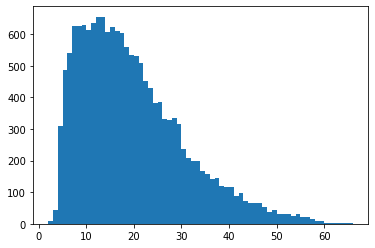

In [ ]:
#For loop for creating the lenghts of the tweets 
#I'm not really sure how this works except that 

lengths = [len(t.split(' ')) for t in tweets]

#Visualizing the tweet length - create a set object

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

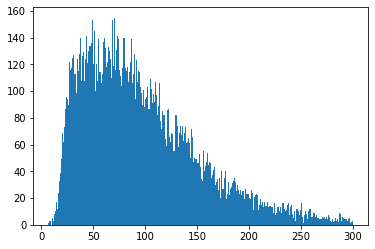

In [ ]:
#Trying to better understand the 

charlength = [len(t) for t in tweets]

plt.hist(charlength, bins=len(set(charlength)))
plt.show()

In [ ]:
#What is lengths? It's a list... 
#Let's try to convert to a dataframe...and get a better sense of the distribution... 

a=pd.DataFrame(charlength)
a.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


## 5. Tokeninzing, Truncating and Padding Sequences



In [ ]:
#The function that tokenizes and pads the tweets... 
#The function seems to eb taking two arguments: "tokenizer" and "tweets"

def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [ ]:
#Runing the "get_sequences" tokenizer...

padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## 6. Preparing the Labels

Nov 28, 2022: This is the part that doesn't make sense... 


In [ ]:
classes=['worry', 'concern', 'dread', 'anxiety', 'fear', 'calm'] # added labels as per the trained model.

print(classes) # ???automation of the labels

['worry', 'concern', 'dread', 'anxiety', 'fear', 'calm']


In [ ]:
#So, then what is the classes object? 

print(type(classes))

<class 'list'>


In [ ]:


classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
classes_to_index

{'worry': 0, 'concern': 1, 'dread': 2, 'anxiety': 3, 'fear': 4, 'calm': 5}

In [ ]:
index_to_classes

{0: 'worry', 1: 'concern', 2: 'dread', 3: 'anxiety', 4: 'fear', 5: 'calm'}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

## 8. Inference

In [ ]:
#Loading the model -> Anger Arousal - Oct 20, 2022 
#I'm not sure about this -> are we loading the right model...


model = keras.models.load_model("/content/drive/MyDrive/Sean/Emoclass_Dec2022/Fear_arousal/Fear_Arousal_Model_6cat_dec10,2022")

In [ ]:
#I'm not sure where this thing came from...I think it was Robin...


#So let's duplicate the code and run it down here... 


train_sequences = get_sequences(tokenizer, tweets)


Inference

In [ ]:

preds=model.predict(train_sequences) 
classes_x=np.argmax(preds,axis=1)
preds.shape

500/500 [==============================] - 11s 16ms/step


(16000, 6)

In [ ]:
inf_df=pd.DataFrame({
    'data':tweets,
    "labels_predicted": classes_x                    
})
inf_df["labels_predicted_marked"]=inf_df['labels_predicted'].apply(lambda x: index_to_classes[x])
inf_df["actual_labels"]=labels
inf_df

,data,labels_predicted,labels_predicted_marked,actual_labels
0,i didnt feel humiliated,2,dread,sadness
1,i can go from feeling so hopeless to so damned...,2,dread,sadness
2,im grabbing a minute to post i feel greedy wrong,5,calm,anger
3,i am ever feeling nostalgic about the fireplac...,0,worry,love
4,i am feeling grouchy,2,dread,anger
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,5,calm,sadness
15996,i am now turning and i feel pathetic that i am...,2,dread,sadness
15997,i feel strong and good overall,2,dread,joy
15998,i feel like this was such a rude comment and i...,5,calm,anger


In [ ]:
#What does our inf_df object look like? 

inf_df.shape

(16000, 4)

#We have an inference dataset... 

Oct 20, 2022: Before we dive into anything here...let's see what we have wtr to classifications / classes. This is one part of the code that doesn't make a lot of sense to me -> i.e. I need to better understand it. 

In [ ]:
#Let's see what it looks like...

inf_df.head()

,data,labels_predicted,labels_predicted_marked,actual_labels
0,i didnt feel humiliated,2,dread,sadness
1,i can go from feeling so hopeless to so damned...,2,dread,sadness
2,im grabbing a minute to post i feel greedy wrong,5,calm,anger
3,i am ever feeling nostalgic about the fireplac...,0,worry,love
4,i am feeling grouchy,2,dread,anger


In [ ]:
inf_df['labels_predicted'].value_counts()

2    7049
5    6017
0    1345
3     794
1     682
4     113
Name: labels_predicted, dtype: int64

In [ ]:
#Let's look at the frequency of these...REmember -> I don't think that this label is working very well...
inf_df['labels_predicted_marked'].value_counts()

KeyError: ignored

In [ ]:
#Let's export the dataset... 

#/content/drive/MyDrive/Sean/Emoclass_Dec2022/Fear_arousal

#filepath =('/content/drive/MyDrive/Sean/Emoclass_Dec2022/Fear_arousal/Fear_arousal_inference_bsavani_Dec10,2022') 

#df.to_csv(filepath)  


#Note Dec 5, 2022 
## We may add some diagnostic code to this workbook. But for now, let's just work with this codebook. As a general strategy, we should be focusing on making codebooks more concise / simpler... 